<a href="https://colab.research.google.com/github/Medhavi-16/ITIT-4103-2021/blob/main/NB-WithoutSmooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
data=np.zeros([70000,784])
data[:60000,:]=x_train; data[60000:,:]=x_test
label=np.zeros(70000)
label[:60000]=y_train; label[60000:]=y_test

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def naive_bayes(data,label):
    n_s,n_f=data.shape          
    classes=np.unique(label)    
    n_c=len(classes)            
    total_data=np.zeros([n_s,n_f+1])
    total_data[:,:-1]=data          
    total_data[:,-1]=label           
    np.random.shuffle(total_data)    
    trainX=total_data[:60000,:]      
    np.random.shuffle(trainX)              
    testX=total_data[60000:,:]       
    np.random.shuffle(testX)         
    testX_c=testX[:,:-1]            
    testX_l=testX[:,-1]              
    mean_v=np.zeros([n_c,n_f])       
    var_v=np.zeros([n_c,n_f])        
    c_prob=[]                        
    confusion_matrix=np.zeros([n_c,n_c])
    d_acc=[]                       
    
    for c in classes:
        trainX_c=trainX[trainX[:,-1]==c]   
        trainX_c=trainX_c[:,:-1]        
        c_prob.append(len(trainX_c)/len(trainX))
        mean_v[int(c),:]=trainX_c.mean(axis=0)
        var_v[int(c),:]=trainX_c.var(axis=0)
    
    var_v=var_v+1000    #Since variance is 0 for many pixels, we need to add some value to the variance. 
                        #Adding 1000 gives one of the best accuracies
    count=0             
    
    for i in range(testX.shape[0]):
        lists=[]   
        for j in range(n_c):
            numerator=np.exp(-((testX_c[i]-mean_v[j])**2)/(2*var_v[j])) 
            denominator=np.sqrt(2*np.pi*(var_v[j]))
            prob_xc=numerator/denominator
            ratio=np.sum(np.log(prob_xc))  
            lists.append(ratio)
            pred=lists.index(max(lists)) 
        if pred == testX_l[i]: 
            count=count+1 
            confusion_matrix[int(testX_l[i])][int(testX_l[i])]=confusion_matrix[int(testX_l[i])][int(testX_l[i])]+1
        else:
            for k in range(n_c):
                if pred == k:
                    confusion_matrix[int(testX_l[k])][int(testX_l[i])]=confusion_matrix[int(testX_l[k])][int(testX_l[i])]+1
                    
    for l in classes:
          check=testX[testX[:,-1]==l] #Filter features for each class
          a=(confusion_matrix[int(l)][int(l)])/check.shape[0] #Find accuracy of each digit
          d_acc.append(a)   #Append individual digit accuracy
      

    o_acc=count/testX.shape[0] #Find overall Accuracy
    return(d_acc,o_acc,confusion_matrix,mean_v,var_v)
      

In [ ]:
(digit_accuracy,overall_accuracy,matrix,mean_v,var_v)=naive_bayes(data,label)

In [ ]:
#Print All class Accuracy
digit=['0', '1', '2', '3', '4', '5', '6','7','8','9']
naive_df = pd.DataFrame(list(zip(digit, digit_accuracy)), columns =['Digit','Digit Accuracy']) 
print('Digit (Individual Class) Accuracy of the Samples:')
naive_df

Digit (Individual Class) Accuracy of the Samples:


,Digit,Digit Accuracy
0,0,0.909990
1,1,0.958627
2,2,0.777665
3,3,0.766337
4,4,0.654434
5,5,0.781350
6,6,0.949692
7,7,0.843385
8,8,0.726505
9,9,0.872362


In [ ]:
print('Overall Accuracy of Naive Bayes Model: '+str(overall_accuracy))
overall_accuracy

Overall Accuracy of Naive Bayes Model: 0.8065


0.8065

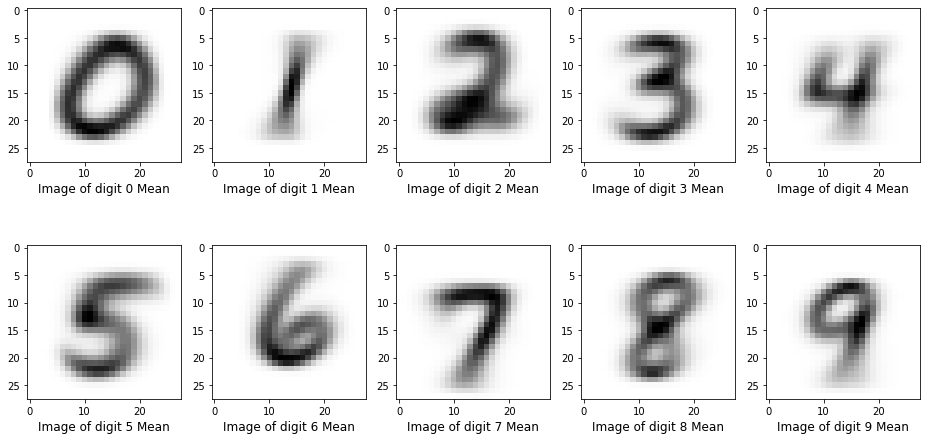

In [ ]:
plt.figure(figsize=(16,8))
for i in range(mean_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = mean_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Mean',fontsize = 12)

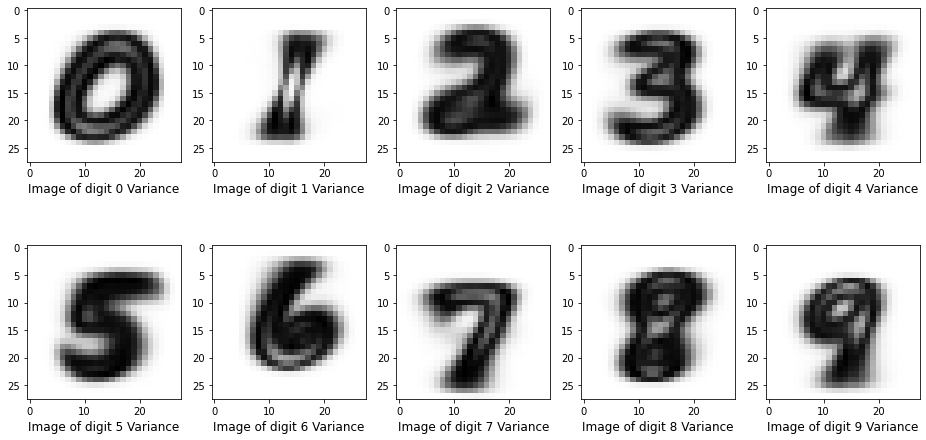

In [ ]:
plt.figure(figsize=(16,8))
for i in range(var_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = var_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Variance',fontsize = 12)

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')